# ДЗ 5 неделя

## Импорт библиотек

In [160]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Первая задача

Интернет-компания “Шарики к празднику” приняла решение улучшить сайт. Были внесены изменения и заработала новая версия сайта на трёх регионах: ['Северо-запад', 'Урал', 'Центр']. Необходимо понять отличается ли время проведённое на сайте, ДО и ПОСЛЕ внесённых изменений по каждому региону. Для этого написать программу, которая бы выводила р-уровень при сравнении среднего времени, проведённого на сайте, по каждому региону.

Данные из файла data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны три столбца. Названия столбцов - показаны ниже

- в первом столбце - время_до
- во втором столбце - время_после
- в третьем столбце названия регионов - регион

В программе необходимо учесть:

- данные распределены не нормально.
- Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['регион', 'р-уровень']. Остальные списки - расчёты по каждому региону.
- Значение р-уровня округлить до четвёртого знака.
- Для расчёта использовать библиотеку scipy.stats
- Выходной список списков отсортировать по значению р-уровню в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [161]:
df = pd.read_csv('1_5.csv', encoding="cp1251", delimiter=";", decimal=",", skipinitialspace=True)
regions = set(df['регион'])
regions_adv = []
for region in regions:
    fraction = df[df["регион"] == region]
    _, p_val = st.mannwhitneyu(x=fraction["время_до"], y=fraction["время_после"])
    regions_adv.append([region, round(p_val, 4)])

regions_adv.sort(key=lambda x: x[1], reverse=False)
print([["регион", "р-уровень"], *regions_adv])

[['регион', 'р-уровень'], ['Центр', 0.004], ['Урал', 0.0094], ['Северо-запад', 0.5067]]


## Вторая задача

Даны пять показателей здоровья по двум группам пациентов. Все пациенты в таблице записаны по строкам. Разделение по группам происходит с помощью столбца group. Необходимо написать программу, которая бы выводила р-уровень при сравнении всех количественных факторов здоровья по двум группам между собой.

Данные из файла data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны 6 столбцов. Названия столбцов - показаны ниже

- в первом столбце group - названия групп
- во втором столбце S, мм.кв - показатель здоровья
- в третьем столбце Av, мДж/с - показатель здоровья
- в четвёртом столбце X, мм - показатель здоровья
- в пятом столбце Y, мм - показатель здоровья
- в шестом столбце V, мм/с - показатель здоровья

В программе необходимо учесть:

- Если данные в обеих группах распределены нормально, то для сравнения использовать метод Стьюдент с различной дисперсией. Если хотя бы в одной группе - не нормальное распределение, то для сравнения использовать метод Манн-Уитни. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05.
- Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель', 'р-уровень', 'метод расчёта']. Остальные списки - расчёты по каждому фактору.
- Значение р-уровня округлить до 4 знака.
- Для расчёта использовать библиотеку scipy.stats
- Выходной список списков отсортировать по значению р-уровню в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [162]:
df = pd.read_csv('2.csv', encoding="cp1251", delimiter=";", decimal=",", skipinitialspace=True)
# 'показатель', 'р-уровень', 'метод расчёта'
result = []
g1, g2 = df[df["group"] == "group_1"].reset_index(drop=True), df[df["group"] == "group_2"].reset_index(drop=True)
columns = df.columns[1:]
for col in columns:
    if st.shapiro(g1[col])[1] > 0.05 and st.shapiro(g2[col])[1] > 0.05:
        _, p_val = st.ttest_ind(x=g1[col], y=g2[col])
        method = "Стьюдент"
    else:
        _, p_val = st.mannwhitneyu(x=g1[col], y=g2[col])
        method = "Манн-Уитни"
    result.append([col, round(p_val, 4), method])
    
    
result.sort(key=lambda x: x[1], reverse=False)
print([['показатель', 'р-уровень', 'метод расчёта'], *result])

[['показатель', 'р-уровень', 'метод расчёта'], ['V, мм/с', 0.2019, 'Манн-Уитни'], ['Av, мДж/с', 0.202, 'Манн-Уитни'], ['Y, мм ', 0.6069, 'Манн-Уитни'], ['S, мм.кв', 0.9123, 'Манн-Уитни'], ['X, мм', 0.9927, 'Манн-Уитни']]


## Третья задача

Группа медиков изучает, какой тип зондирования при проведении медицинского осмотра пациентов лучше. Исследуется два типа зондирования: Классическое и Двойное эндоскопическое сопровождение . В таблице они обозначены как фактор(столбец) вид_зондирования. Были зафиксированы случаи осложнений по каждому пациенту. В таблицу заносили по каждому типу осложнений, как да или нет (были или не были осложнения после исследования). Всего возможно четыре типа осложнений. В таблице они обозначены как 4 фактора(столбца) ['тип_осложнения_1', 'тип_осложнения_2', 'тип_осложнения_3', 'тип_осложнения_4'].

Данные из файла в data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны 6 столбцов. Названия столбцов - показаны ниже

в первом столбце вид_зондирования - названия типа зондирования
во втором столбце время_зондирования, сек - время операции
в третьем столбце тип_осложнения_1 - тип осложнения
в четвёртом столбце тип_осложнения_2 - тип осложнения
в пятом столбце тип_осложнения_3 - тип осложнения
в шестом столбце тип_осложнения_4 - тип осложнения

Необходимо написать программу, которая бы выводила р-уровень при сравнении каждого типа осложнений и типа зондирования.

- В программе необходимо учесть:
- результатом работы функции должен быть список списков. Первый список - названия выводимых результатов: ['показатель', 'р-уровень']. Остальные списки - расчёты по каждому типу осложнения.
- значение р-уровня округлить до 4 знака.
- для расчёта использовать библиотеку scipy.stats
- выходной список списков отсортировать по значению р-уровню в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [163]:
df = pd.read_csv('3.csv', encoding="cp1251", delimiter=";", decimal=",", skipinitialspace=True)
types = df.columns[2:]
result = []
for t in types:
    ct = pd.crosstab(df["вид_зондирования"], df[t])
    p = st.chi2_contingency(ct, correction=True)[1]
    result.append([t, round(p, 4)])

result.sort(key=lambda x: x[1], reverse=False)
print([['Показатель', 'р-уровень'], *result])

[['Показатель', 'р-уровень'], ['тип_осложнения_1', 0.0045], ['тип_осложнения_4', 0.3886], ['тип_осложнения_2', 0.4974], ['тип_осложнения_3', 1.0]]


## Четвёртая задача

Даны десять показателей здоровья по двум группам пациентов Группа_1 и Группа_2. Все пациенты в таблице записаны по строкам. Разделение по группам происходит с помощью столбца Группа. Необходимо написать программу, которая бы выводила значение корреляции и р-уровень в Группе_1 по каждой паре количественных факторов из исходной таблицы.

Данные из файла data.csv.
Разделитель значений - точка с запятой. Разделителем дробных чисел применяется запятая. В таблице даны 11 столбцов. Названия столбцов - показаны ниже

в первом столбце группа - группы пациентов
во втором столбце К - показатель здоровья
в третьем столбце Ca - показатель здоровья
в четвёртом столбце V - показатель здоровья
в пятом столбце Cd - показатель здоровья
в шестом столбце I - показатель здоровья
в седьмом столбце Pb - показатель здоровья
в восьмом столбце Q39_Corineform - показатель здоровья
в девятом столбце Q56_Pseudonocardia - показатель здоровья
в десятом столбце Q56Общеекол-во_МО - показатель здоровья
в одиннадцатом столбце Q57Плазмологенмкг/мл - показатель здоровья

В программе необходимо учесть:

- Если данные в обоих сравниваемых факторов распределены нормально, то для сравнения использовать метод корреляции Пирсон. Если хотя бы в одном факторе - не нормальное распределение, то для расчёта корреляции использовать метод Спирмен. Для проверки на нормальность использовать метод Шапиро c уровнем принятия решения 0.05.
- Результат вывести в виде списка списков. Первый список - названия выводимых результатов: ['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции']. Остальные списки - расчёты по каждому фактору.
- Значение р-уровня округлить до четвёртого знака.

- Значение корреляции округлить до второго знака.
- Вывести только те расчёты, у которых р-уровень меньше 0.05
- Корреляцию показателя самого с собой - не выводить.
- Дублирование строк - исключить. (дублирование это: влияние 'xy' равно влиянию 'yx')
- Для расчёта использовать библиотеку scipy.stats
- Итоговый список списков отсортировать по значению корреляции в порядке убывания значимости (чем меньше р-уровень, тем выше значимость)

In [164]:
df = pd.read_csv('4.csv', encoding="cp1251", delimiter=";", decimal=",", skipinitialspace=True)
cols = df.columns[1:]
df = df[df["Группа"] == "Группа_1"].reset_index(drop=True)[cols]
result = []
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        col_i, col_j = cols[i], cols[j]
        data_i, data_j = df[col_i], df[col_j]
        if st.shapiro(data_i)[1] > 0.05 and st.shapiro(data_j)[1] > 0.05:
            method = "Пирсон"
            cor, p_val = st.pearsonr(x=data_i, y=data_j)
        else:
            method = "Спирмен"
            cor, p_val = st.spearmanr(data_i, data_j)
        
        if p_val < 0.05:
            result.append([col_i, col_j, round(cor, 2), round(p_val, 4), method])

result.sort(key=lambda x: x[2], reverse=True)
print([['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'], *result])

[['показатель 1', 'показатель 2', 'значение корреляции', 'р-уровень', 'метод корреляции'], ['Q39_Corineform', 'Q56_Общее_кол-во_МО', 0.73, 0.0, 'Спирмен'], ['Q56_Pseudonocardia', 'Q56_Общее_кол-во_МО', 0.61, 0.0001, 'Спирмен'], ['Q39_Corineform', 'Q56_Pseudonocardia', 0.58, 0.0002, 'Спирмен'], ['K', 'V', 0.54, 0.0008, 'Спирмен'], ['V', 'Cd', 0.48, 0.0036, 'Спирмен'], ['Q56_Pseudonocardia', 'Q57_Плазмологен_мкг/мл', 0.37, 0.0276, 'Пирсон'], ['Ca', 'Q57_Плазмологен_мкг/мл', 0.35, 0.0415, 'Пирсон'], ['Cd', 'Q56_Pseudonocardia', -0.37, 0.0292, 'Спирмен'], ['V', 'Q39_Corineform', -0.42, 0.0123, 'Спирмен'], ['V', 'Q56_Общее_кол-во_МО', -0.43, 0.0099, 'Спирмен'], ['I', 'Q39_Corineform', -0.46, 0.0052, 'Спирмен'], ['Cd', 'Q56_Общее_кол-во_МО', -0.5, 0.0025, 'Спирмен'], ['Cd', 'Q39_Corineform', -0.61, 0.0001, 'Спирмен']]


## Пятая задача

Перед вами данные, как и в первой задаче.
Там речь шла об интернет-компании “Шарики к празднику”.
Она внедряла улучшения в дизайне сайта. Новая версия сайта работала на трёх регионах: ['Северо-запад', 'Урал', 'Центр'].

В исходной таблице три столбца: время_до, время_после, регион

Построить график "ящик с усами" по факторам время_до, время_после.
Необходимо учесть:

- Два ящика выводить на одном графике;
- Сделать код, который бы строил график по одному региону. Регион вводится;
- Параметры графика оставить по умолчанию.
- файл с графиком надо сохранять с названием target_5_5.png

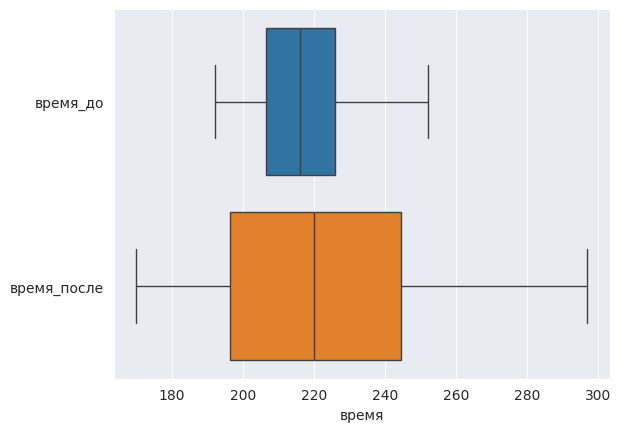

In [165]:
df = pd.read_csv('1_5.csv', encoding="cp1251", delimiter=";", decimal=",", skipinitialspace=True)

region = input()
df = df[df["регион"] == region].reset_index(drop=True)
sns.boxplot(data=[df["время_до"], df["время_после"]], orient="h").set_xlabel("время")
plt.savefig("target_5_5.png")
